# Test `make_runoff_file` for v202111

This notebook was used to develop and test the code for generation of the v202111 daily runoff forcing files.
Those runoff files are based on day-averaged discharge (1 day lagged) observations from gauged rivers across
the SalishSeaCast model domain.
That replaces the use of climatology for all watersheds,
in contrast to prior model versions that used observations for the Fraser River at Hope and climatology for all
other rivers.

The original version of this notebook was created by Susan and was copied in from
`tools/I_ForcingFiles/Rivers/ProductionDailyRiverNCfile.ipynb`.

The Python module that Susan created by extracting the most of the code from that notebook was copied in from
`tools/I_ForcingFiles/Rivers/DailyRiverFlows.py` as `nowcast.daily_river_flows`.

That code was refactored and integrated into `nowcast.workers.make_runoff_file` using this notebook for functional
and visualization testing along the way as unit tests for the refactored code were developed in
`tests.workers.test_make_runoff_file`.

Execution of this notebook requires:
* `salishsea-nowcast` env with `jupyterlab` installed
* `rivers."rivers dir"` in `nowcast.yaml` set to `/tmp/`
* access to `/results/forcing/rivers/observations/` (perhaps via `sshfs -o ro` mount)
* access to `/data/dlatorne/SOG-projects/SOG-forcing/ECget/` (perhaps via `sshfs -o ro` mount)

In [1]:
import arrow
#import datetime as dt

#import pandas as pd
#from pathlib import Path
#import xarray as xr
import yaml

#from salishsea_tools import rivertools
#from salishsea_tools import river_202108 as rivers

from nowcast.daily_river_flows import make_runoff_files

#prop_dict_name ='river_202108'
#bathy_type = 'b202108'

In [2]:
config_file = '../config/nowcast.yaml'
with open(config_file, "r") as stream:
    config = yaml.safe_load(stream)
#config

In [3]:
# Date Range
dateneeded = arrow.get(2023, 2, 5)
print (dateneeded)

2023-02-05T00:00:00+00:00


In [4]:
make_runoff_files(dateneeded, config)

bute
no secondary
[[69.44264275]]
evi_n
no secondary
[[754.16312588]]
jervis
[[255.93966049]]
evi_s
no secondary
[[424.640526]]
howe
no secondary
[[95.57461136]]
jdf
no secondary


/media/doug/warehouse/MEOPAR/SalishSeaNowcast/nowcast/daily_river_flows.py:125: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  river_flow = pd.read_csv(
/media/doug/warehouse/MEOPAR/SalishSeaNowcast/nowcast/daily_river_flows.py:125: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  river_flow = pd.read_csv(


[[627.19672417]]
skagit
[[520.2599304]]
puget


/media/doug/warehouse/MEOPAR/SalishSeaNowcast/nowcast/daily_river_flows.py:125: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  river_flow = pd.read_csv(
/media/doug/warehouse/MEOPAR/SalishSeaNowcast/nowcast/daily_river_flows.py:125: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  river_flow = pd.read_csv(
/media/doug/warehouse/MEOPAR/SalishSeaNowcast/nowcast/daily_river_flows.py:125: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  river_flow = pd.read_csv(


[[490.24771327]]
toba
[[133.01744522]]
fraser


/media/doug/warehouse/MEOPAR/SalishSeaNowcast/nowcast/daily_river_flows.py:125: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  river_flow = pd.read_csv(


[[943.07805743]]
files read
/tmp/R202108Dailies_y2023m02d05.nc


## Plotting and Checking

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import nc_tools, viz_tools


In [6]:
bathy = xr.open_dataset('../../grid/bathymetry_202108.nc')

In [7]:
imin, imax = 0, 898
jmin, jmax = 0, 394
jj = range(jmax)
ii = range(imax)
jjm, iim = np.meshgrid(jj, ii)

In [8]:
def nemo_yyyymmdd(data_date):
  return data_date.format("[y]YYYY[m]MM[d]DD")

### Compare Subsequent Day's Runoff Forcing Files

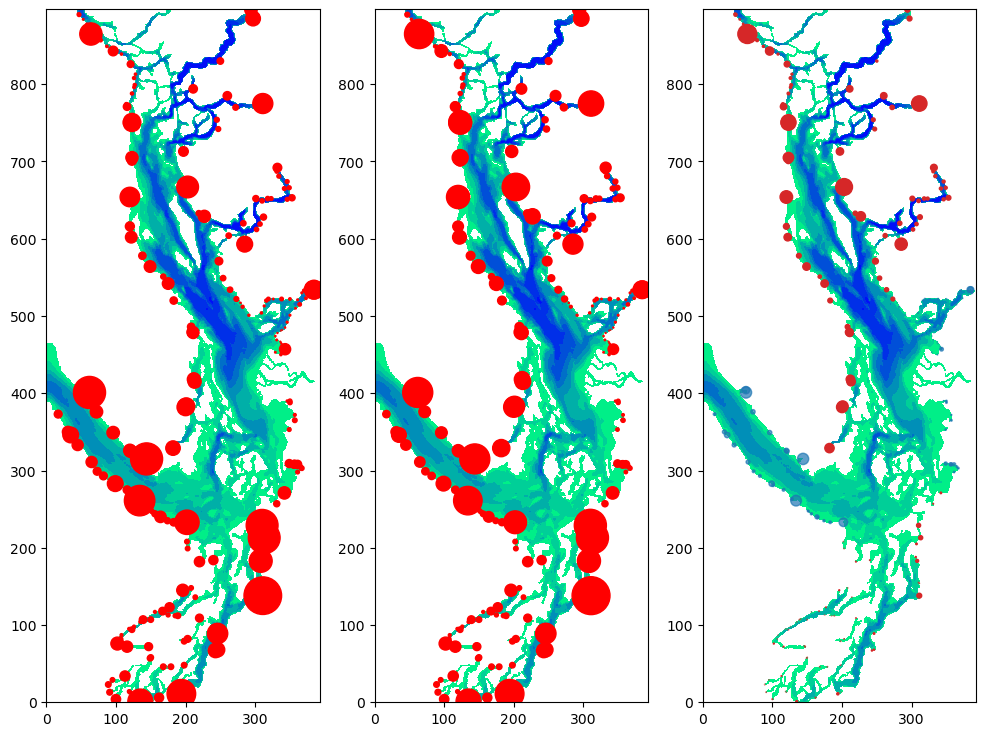

In [9]:
compare = xr.open_dataset(f'/results/forcing/rivers/R202108Dailies_{nemo_yyyymmdd(dateneeded.shift(days=-1))}.nc')
readitin = xr.open_dataset(f'/tmp/R202108Dailies_{nemo_yyyymmdd(dateneeded)}.nc')
fluxarray = np.array(readitin.rorunoff[0, :, :jmax])
climatearray = np.array(compare.rorunoff[0, :, :jmax])
fig, axs = plt.subplots(1, 3, figsize=(12, 9))
for ax in axs:
    ax.contourf(bathy.Bathymetry[imin:imax, jmin:jmax], cmap='winter_r')

axs[1].scatter(jjm[fluxarray>0], iim[fluxarray>0], s=fluxarray[fluxarray>0]*1000, color='r')
axs[0].scatter(jjm[climatearray>0], iim[climatearray>0], s=climatearray[climatearray>0]*1000, color='r')
axs[2].scatter(jjm[fluxarray>climatearray], iim[fluxarray>climatearray],
               s=(fluxarray[fluxarray>climatearray]-climatearray[fluxarray>climatearray])*1000, color='tab:red')
axs[2].scatter(jjm[fluxarray<climatearray], iim[fluxarray<climatearray],
               s=(-fluxarray[fluxarray<climatearray]+climatearray[fluxarray<climatearray])*1000, color='tab:blue', alpha=0.7)

readitin.close()
compare.close()

#### Reference Version of Figure Above for Comparison

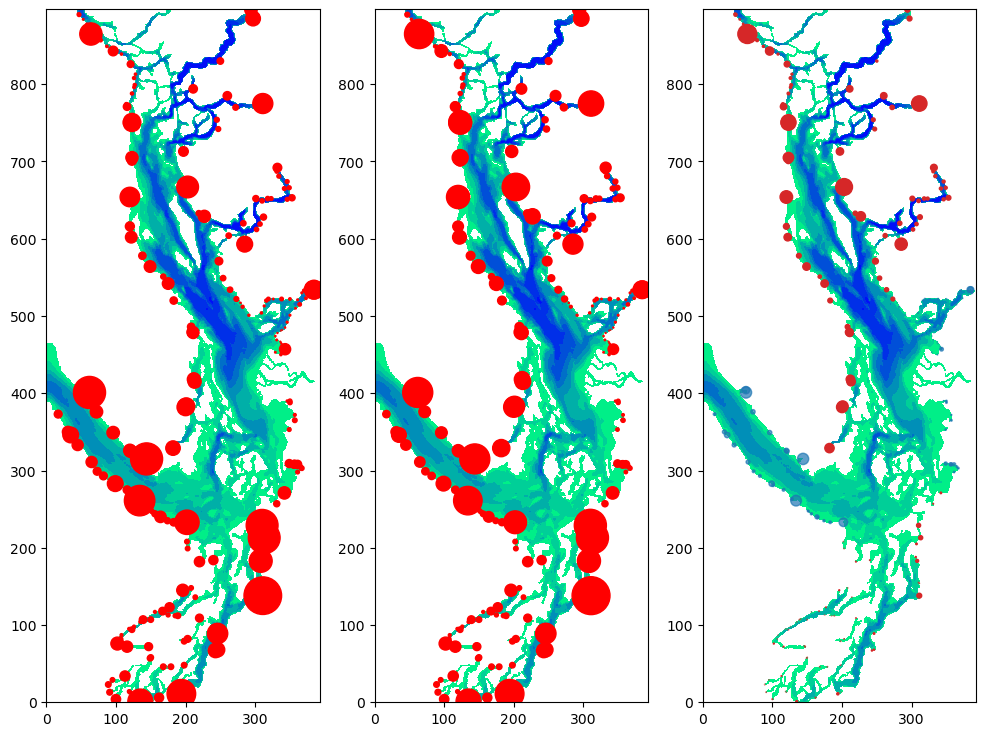

In [22]:
compare = xr.open_dataset(f'/results/forcing/rivers/R202108Dailies_{nemo_yyyymmdd(dateneeded.shift(days=-1))}.nc')
readitin = xr.open_dataset(f'/tmp/R202108Dailies_{nemo_yyyymmdd(dateneeded)}.nc')
fluxarray = np.array(readitin.rorunoff[0, :, :jmax])
climatearray = np.array(compare.rorunoff[0, :, :jmax])
fig, axs = plt.subplots(1, 3, figsize=(12, 9))
for ax in axs:
    ax.contourf(bathy.Bathymetry[imin:imax, jmin:jmax], cmap='winter_r')

axs[1].scatter(jjm[fluxarray>0], iim[fluxarray>0], s=fluxarray[fluxarray>0]*1000, color='r')
axs[0].scatter(jjm[climatearray>0], iim[climatearray>0], s=climatearray[climatearray>0]*1000, color='r')
axs[2].scatter(jjm[fluxarray>climatearray], iim[fluxarray>climatearray],
               s=(fluxarray[fluxarray>climatearray]-climatearray[fluxarray>climatearray])*1000, color='tab:red')
axs[2].scatter(jjm[fluxarray<climatearray], iim[fluxarray<climatearray],
               s=(-fluxarray[fluxarray<climatearray]+climatearray[fluxarray<climatearray])*1000, color='tab:blue', alpha=0.7)

readitin.close()
compare.close()